In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import zscore, iqr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, roc_curve

## 1. Problem Statement

### Description

- The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Fuel Type Aggregation
- We define the "Fuel Type" attribute of our database based on common fuel categories. 

#### Prediction :   
- Make two prediction  1) Fuel Type   2) capacity_mw 

## 2. Data Gathering

In [2]:
df = pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\database_IND.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(908, 25)

In [6]:
df.axes

[RangeIndex(start=0, stop=908, step=1),
 Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
        'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
        'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
        'geolocation_source', 'wepp_id', 'year_of_capacity_data',
        'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
        'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
        'estimated_generation_gwh'],
       dtype='object')]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [8]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [9]:
cat_features = df.select_dtypes(include='object')
cat_features

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,NaN,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,Gas,NaN,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,Coal,Oil,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,Coal,Oil,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN
906,IND,India,ZAWAR MINES,WRI1019901,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN


In [10]:
num_features = df.select_dtypes(exclude='object')
num_features

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,2.5,28.1839,73.2407,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,NaN,2004.0,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,NaN
4,1800.0,21.9603,82.4091,NaN,2015.0,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,NaN,2016.0,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,NaN
904,3.0,12.8932,78.1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [12]:
df.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'], axis = 1, inplace = True)

In [13]:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

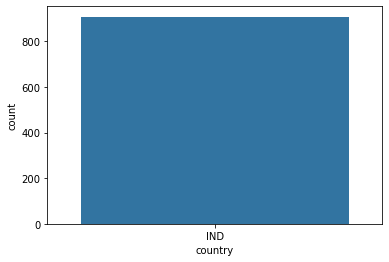

In [14]:
sns.countplot(df['country'])

In [15]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

<AxesSubplot:xlabel='country_long', ylabel='count'>

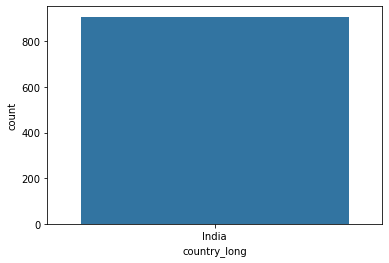

In [16]:
sns.countplot(df['country_long'])

In [17]:
df['name'].value_counts()

NARIMANGLAM                          1
KALINADI                             1
TROMBAY WORKS                        1
KS Oils Chinnakuyili Wind Farm       1
PAINAMPURAM                          1
                                    ..
PYKARA                               1
FARAKKA STPS                         1
Rajgarh - Ujaas Solar Power Plant    1
LOWER JURALA                         1
JAISALMER GODAWARI                   1
Name: name, Length: 908, dtype: int64

In [18]:
df['gppd_idnr'].value_counts()

WRI1019904    1
WRI1026191    1
IND0000412    1
IND0000421    1
IND0000383    1
             ..
WRI1026222    1
IND0000080    1
IND0000231    1
IND0000243    1
IND0000330    1
Name: gppd_idnr, Length: 908, dtype: int64

In [19]:
df['latitude'].value_counts()

24.1917    3
19.0004    3
10.3118    2
15.1839    2
14.2133    2
          ..
23.9784    1
24.5216    1
17.5010    1
20.9099    1
16.3125    1
Name: latitude, Length: 837, dtype: int64

In [20]:
df['longitude'].value_counts()

71.6917    4
75.8988    3
81.2875    3
71.6918    3
72.8983    3
          ..
79.0548    1
78.6463    1
88.4562    1
75.5302    1
87.2500    1
Name: longitude, Length: 828, dtype: int64

In [21]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

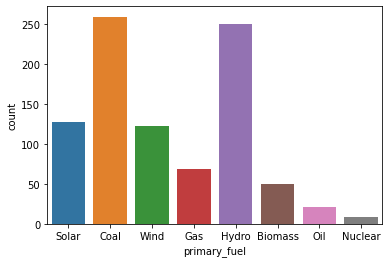

In [22]:
sns.countplot(df['primary_fuel'])

In [23]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

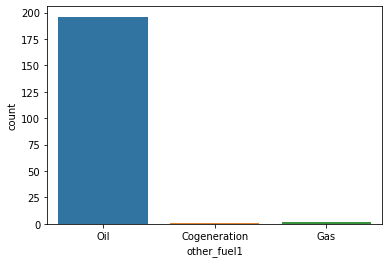

In [24]:
sns.countplot(df['other_fuel1'])

In [25]:
df['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [26]:
df['owner'].value_counts()

Acc Acc ltd                                        4
Jk Cement ltd                                      4
Sterling Agro Industries ltd.                      4
Karnataka Power Corporation Limited                3
Shree Sugars ltd                                   3
                                                  ..
Vivek Pharmachem (India) Limited                   1
Maral Overseas ltd                                 1
Gmt Pvt ltd                                        1
India Oil Corporation Limited                      1
Taxus Infrastructure and Power Projects Pvt Ltd    1
Name: owner, Length: 280, dtype: int64

In [27]:
df['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Greta Energy ltd                               1
Clover Solar Private Limited (CSPL)            1
Yashwantrao Krishna ssk                        1
Shri Hiranyakeshi ssk                          1
Shri Malaprabha ssk                            1
Name: source, Length: 191, dtype: int64

In [28]:
df['url'].value_counts()

http://www.cea.nic.in/                                                                                                520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                         7
http://www.ntpc.co.in                                                                                                   6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                        5
http://energy.rajasthan.gov.in/content/dam/raj/energy/common/Details%20of%20commissioned%20Solar%20Projects%20.pdf      4
                                                                                                                     ... 
http://www.ril.com/                                                                                                     1
http://www.esselgroup.com                                                                                               1
http://icmlindia.com    

In [29]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

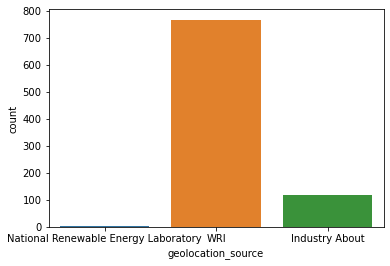

In [30]:
sns.countplot(df['geolocation_source'])

In [31]:
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [32]:
df['generation_gwh_2013'].value_counts()

0.00000       21
1262.13760     1
182.13000      1
108.98235      1
808.83550      1
              ..
2998.44600     1
3683.91000     1
6397.00000     1
941.00000      1
1730.00000     1
Name: generation_gwh_2013, Length: 364, dtype: int64

In [33]:
df['generation_gwh_2014'].value_counts()

0.00000        28
483.04300       1
770.18000       1
1014.80000      1
3968.14100      1
               ..
1103.93260      1
18807.00000     1
5380.26710      1
2.85387         1
7744.00000      1
Name: generation_gwh_2014, Length: 374, dtype: int64

In [34]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

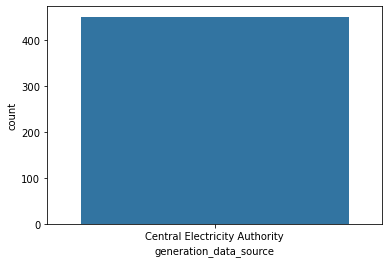

In [35]:
sns.countplot(df['generation_data_source'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                862 non-null    float64
 6   longitude               862 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   other_fuel1             199 non-null    object 
 9   commissioning_year      528 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  908 non-null    object 
 12  url                     908 non-null    object 
 13  geolocation_source      889 non-null    object 
 14  year_of_capacity_data   520 non-null    fl

In [37]:
df.drop(['country','country_long','name','gppd_idnr','year_of_capacity_data'],axis = 1,inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             908 non-null    float64
 1   latitude                862 non-null    float64
 2   longitude               862 non-null    float64
 3   primary_fuel            908 non-null    object 
 4   other_fuel1             199 non-null    object 
 5   commissioning_year      528 non-null    float64
 6   owner                   342 non-null    object 
 7   source                  908 non-null    object 
 8   url                     908 non-null    object 
 9   geolocation_source      889 non-null    object 
 10  generation_gwh_2013     384 non-null    float64
 11  generation_gwh_2014     401 non-null    float64
 12  generation_gwh_2015     425 non-null    float64
 13  generation_gwh_2016     437 non-null    float64
 14  generation_gwh_2017     443 non-null    fl

In [39]:
df.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [40]:
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

In [41]:
fuel_df = pd.get_dummies(df['other_fuel1'], drop_first=True)
fuel_df

,Gas,Oil
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
903,0,1
904,0,0
905,0,0
906,0,0


In [42]:
geoloc_df = pd.get_dummies(df['geolocation_source'], drop_first=True)
geoloc_df

,National Renewable Energy Laboratory,WRI
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
903,0,1
904,0,0
905,0,1
906,0,1


In [43]:
df.drop(['other_fuel1','url','geolocation_source'], axis = 1, inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             908 non-null    float64
 1   latitude                908 non-null    float64
 2   longitude               908 non-null    float64
 3   primary_fuel            908 non-null    object 
 4   commissioning_year      528 non-null    float64
 5   owner                   342 non-null    object 
 6   source                  908 non-null    object 
 7   generation_gwh_2013     384 non-null    float64
 8   generation_gwh_2014     401 non-null    float64
 9   generation_gwh_2015     425 non-null    float64
 10  generation_gwh_2016     437 non-null    float64
 11  generation_gwh_2017     443 non-null    float64
 12  generation_data_source  450 non-null    object 
dtypes: float64(9), object(4)
memory usage: 92.3+ KB


In [45]:
df['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Greta Energy ltd                               1
Clover Solar Private Limited (CSPL)            1
Yashwantrao Krishna ssk                        1
Shri Hiranyakeshi ssk                          1
Shri Malaprabha ssk                            1
Name: source, Length: 191, dtype: int64

In [46]:
source_df = pd.get_dummies(df['source'])
df1 = pd.concat([source_df['Central Electricity Authority'],source_df['CDM']], axis = 1)
df1

,Central Electricity Authority,CDM
0,0,0
1,0,0
2,0,1
3,1,0
4,1,0
...,...,...
903,1,0
904,0,0
905,0,1
906,0,0


In [47]:
df.drop('source', axis = 1, inplace = True)

In [48]:
df.drop('owner', axis = 1, inplace =True)

In [49]:
df['generation_data_source'].fillna(0, inplace = True)

In [50]:
df['generation_data_source'].value_counts()

0                                458
Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [51]:
df['generation_data_source'].replace({'Central Electricity Authority':1}, inplace = True)

In [52]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [53]:
df['primary_fuel'].replace({'Coal':0,'Hydro':1,'Solar':2,'Wind':3,'Gas':4,'Biomass':5,'Oil':6,'Nuclear':7}, inplace = True)

In [54]:
df = pd.concat([df,fuel_df, geoloc_df, df1], axis = 1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   capacity_mw                           908 non-null    float64
 1   latitude                              908 non-null    float64
 2   longitude                             908 non-null    float64
 3   primary_fuel                          908 non-null    int64  
 4   commissioning_year                    528 non-null    float64
 5   generation_gwh_2013                   384 non-null    float64
 6   generation_gwh_2014                   401 non-null    float64
 7   generation_gwh_2015                   425 non-null    float64
 8   generation_gwh_2016                   437 non-null    float64
 9   generation_gwh_2017                   443 non-null    float64
 10  generation_data_source                908 non-null    int64  
 11  Gas                

In [56]:
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(), inplace = True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace = True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace = True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace = True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace = True)

In [57]:
df['commissioning_year'].fillna(2013, inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   capacity_mw                           908 non-null    float64
 1   latitude                              908 non-null    float64
 2   longitude                             908 non-null    float64
 3   primary_fuel                          908 non-null    int64  
 4   commissioning_year                    908 non-null    float64
 5   generation_gwh_2013                   908 non-null    float64
 6   generation_gwh_2014                   908 non-null    float64
 7   generation_gwh_2015                   908 non-null    float64
 8   generation_gwh_2016                   908 non-null    float64
 9   generation_gwh_2017                   908 non-null    float64
 10  generation_data_source                908 non-null    int64  
 11  Gas                

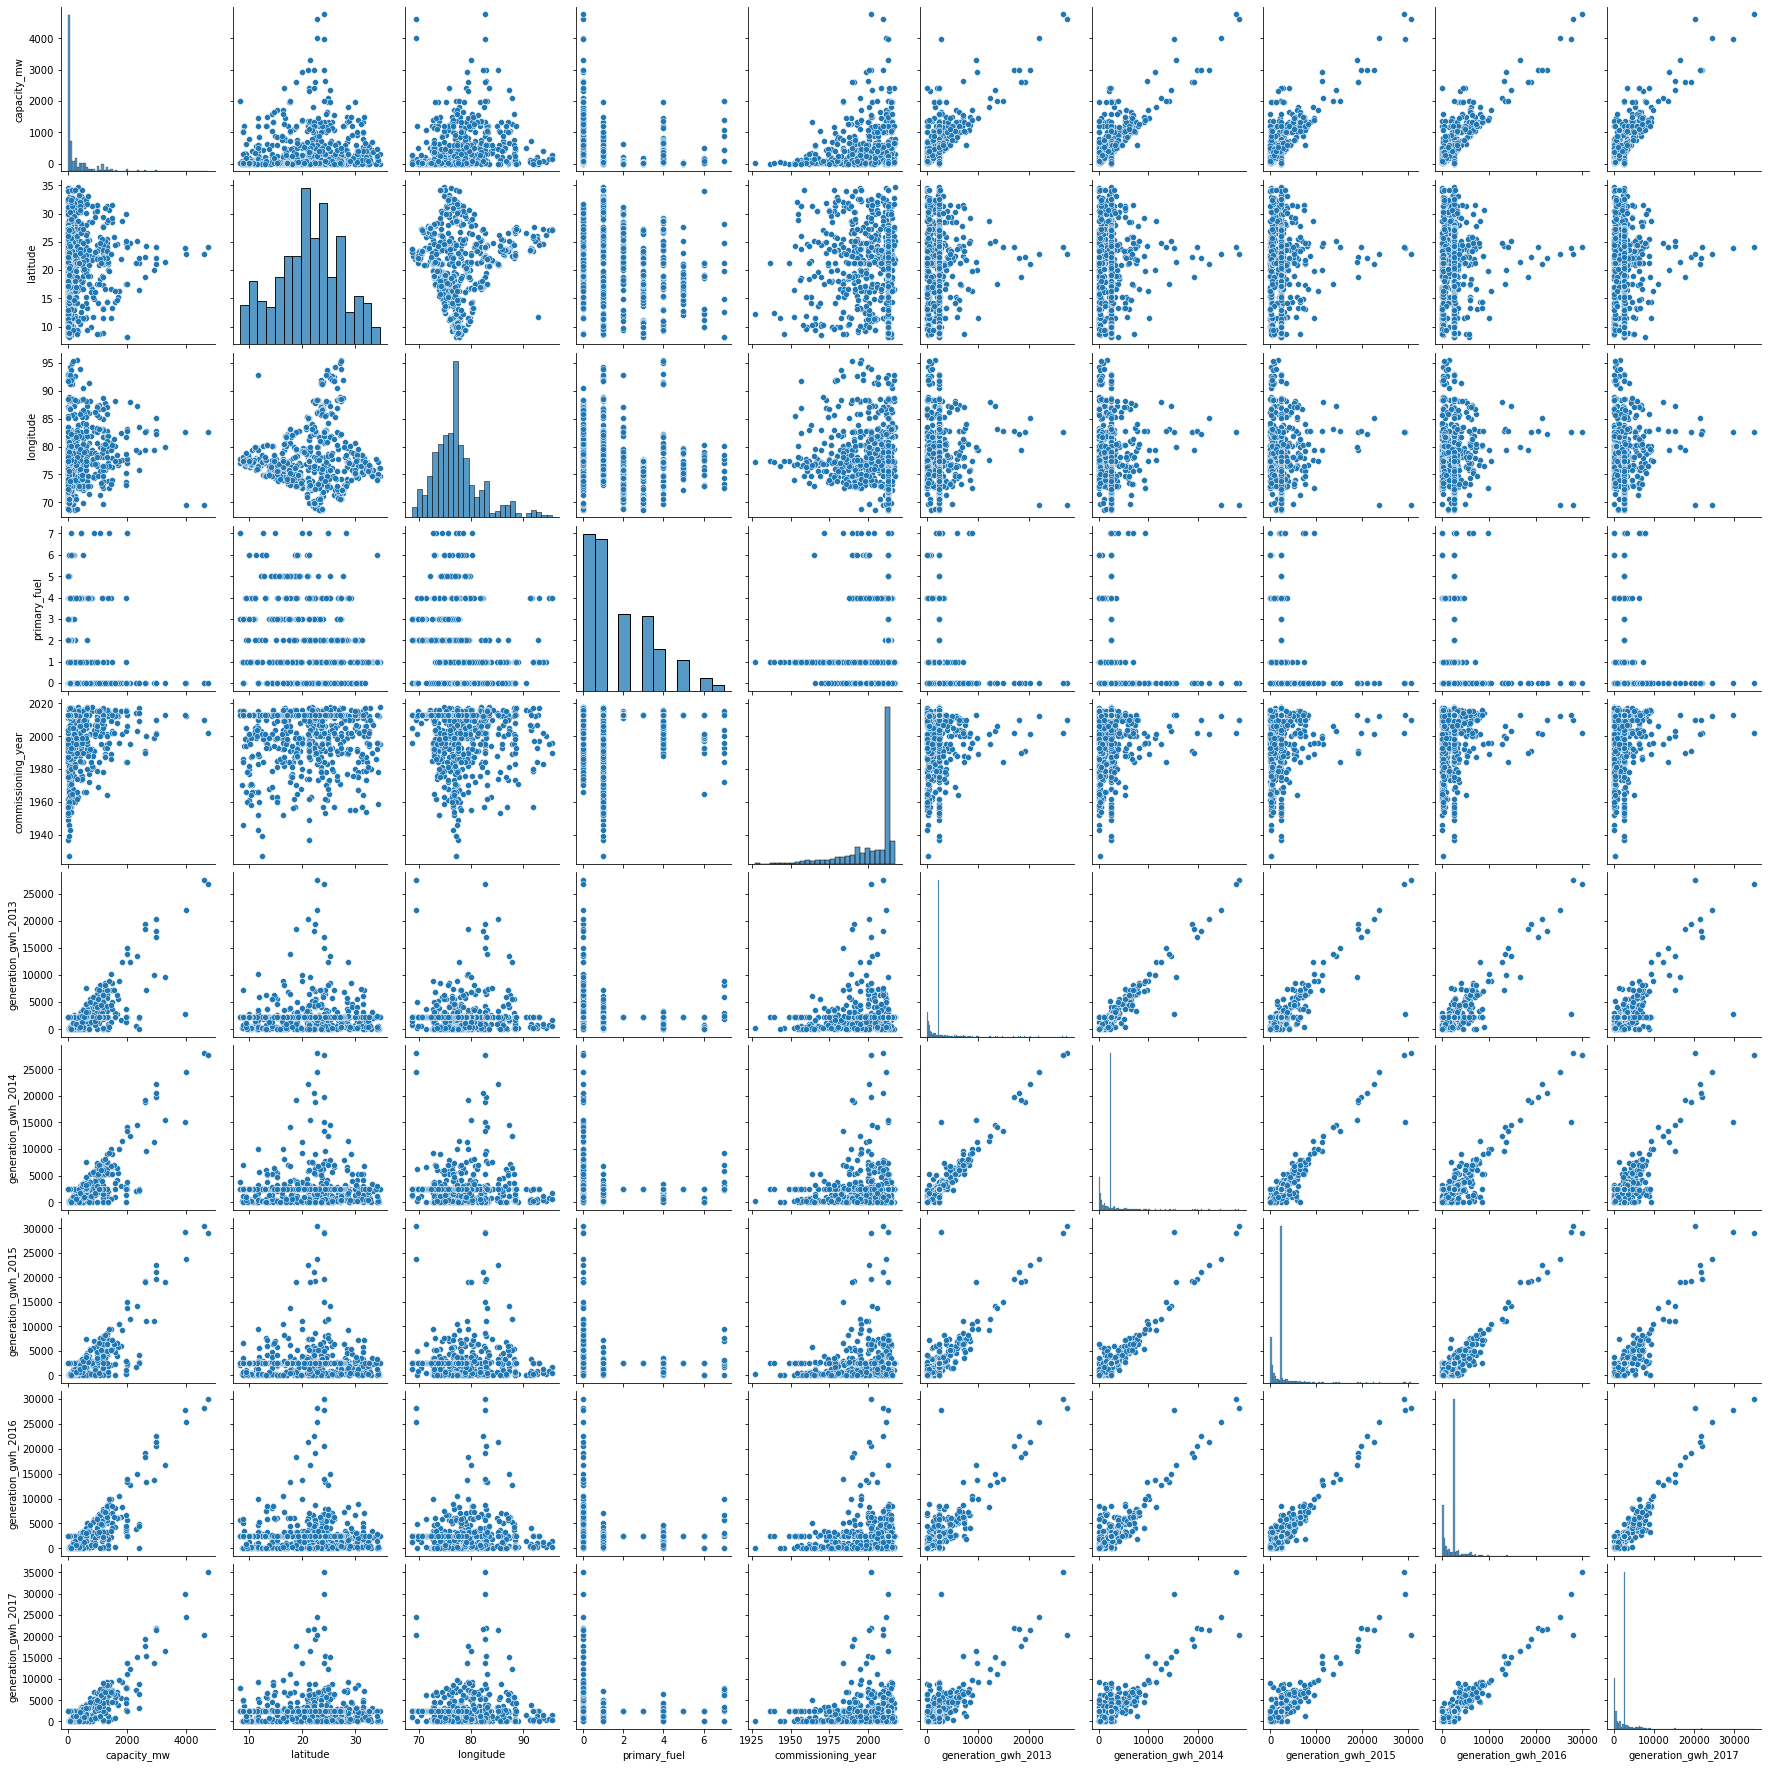

In [59]:
sns.pairplot(df.iloc[:,:10], kind = 'scatter')

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

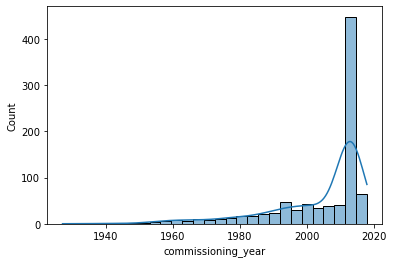

In [60]:
sns.histplot(df['commissioning_year'], kde = True)

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Count'>

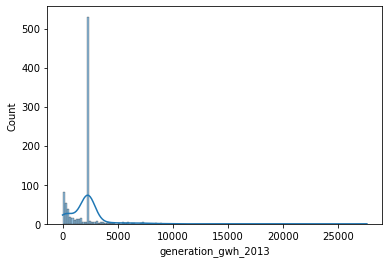

In [61]:
sns.histplot(df['generation_gwh_2013'], kde = True)

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

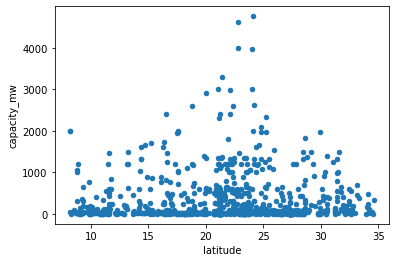

In [62]:
df.plot(x = 'latitude', y = 'capacity_mw', kind = 'scatter')

In [63]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Gas,Oil,National Renewable Energy Laboratory,WRI,Central Electricity Authority,CDM
capacity_mw,1.000000,0.049790,0.197124,-0.297222,0.012518,6.678419e-01,7.054341e-01,7.220814e-01,7.528288e-01,7.670398e-01,4.946943e-01,0.000320,0.625756,-2.886854e-02,2.215175e-01,4.168792e-01,-1.974050e-01
latitude,0.049790,1.000000,0.031501,-0.213815,0.034896,3.663949e-02,4.408464e-02,3.612730e-02,3.093239e-02,3.065498e-02,8.641987e-02,-0.016955,0.051627,6.974538e-02,-1.776970e-01,7.880765e-02,-1.868294e-01
longitude,0.197124,0.031501,1.000000,-0.273687,-0.145117,1.402097e-02,1.166872e-02,1.917647e-02,3.975774e-02,4.040690e-02,4.086751e-01,-0.044732,0.301852,-7.178200e-02,2.415920e-01,4.268299e-01,-2.401802e-01
primary_fuel,-0.297222,-0.213815,-0.273687,1.000000,0.165326,-1.534764e-01,-1.618161e-01,-1.600250e-01,-1.704695e-01,-1.604125e-01,-3.165766e-01,0.117165,-0.494298,9.798028e-03,-9.009891e-02,-3.779774e-01,2.899884e-01
commissioning_year,0.012518,0.034896,-0.145117,0.165326,1.000000,9.453018e-02,1.145342e-01,1.273249e-01,1.472747e-01,1.478741e-01,-3.566688e-01,-0.080595,0.058462,3.985801e-02,-2.656531e-01,-5.322059e-01,2.448276e-01
generation_gwh_2013,0.667842,0.036639,0.014021,-0.153476,0.094530,1.000000e+00,9.634535e-01,8.963761e-01,8.735420e-01,8.306385e-01,-3.811684e-16,-0.039600,0.346118,-2.262630e-17,1.990487e-16,-6.097619e-17,-1.179289e-17
generation_gwh_2014,0.705434,0.044085,0.011669,-0.161816,0.114534,9.634535e-01,1.000000e+00,9.537116e-01,9.260100e-01,8.918721e-01,1.302481e-16,-0.035897,0.361000,9.479977e-18,7.559937e-18,-1.008352e-16,7.863147e-17
generation_gwh_2015,0.722081,0.036127,0.019176,-0.160025,0.127325,8.963761e-01,9.537116e-01,1.000000e+00,9.689693e-01,9.284589e-01,-2.539148e-16,-0.039555,0.357516,-2.409098e-17,-3.882336e-17,-3.330540e-16,-1.110443e-16
generation_gwh_2016,0.752829,0.030932,0.039758,-0.170469,0.147275,8.735420e-01,9.260100e-01,9.689693e-01,1.000000e+00,9.647861e-01,-2.443087e-16,-0.040073,0.377055,-3.361866e-17,-1.080114e-16,-8.012954e-17,-1.668521e-16
generation_gwh_2017,0.767040,0.030655,0.040407,-0.160412,0.147874,8.306385e-01,8.918721e-01,9.284589e-01,9.647861e-01,1.000000e+00,-4.951972e-17,-0.020359,0.385276,4.169302e-18,-4.458547e-17,4.729493e-16,-5.064576e-17


<AxesSubplot:>

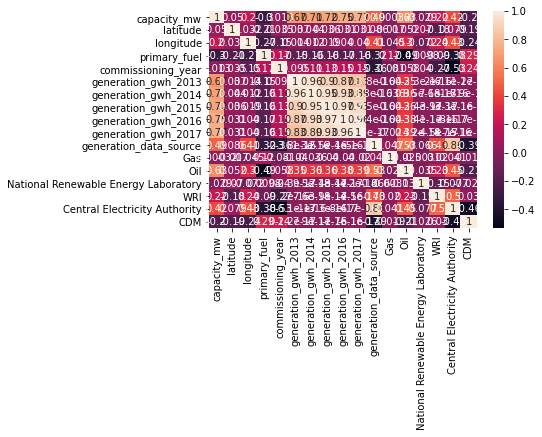

In [64]:
sns.heatmap(df.corr(), annot = True)

In [65]:
x = df.drop('capacity_mw', axis = 1)
y = df['capacity_mw']

<AxesSubplot:xlabel='latitude'>

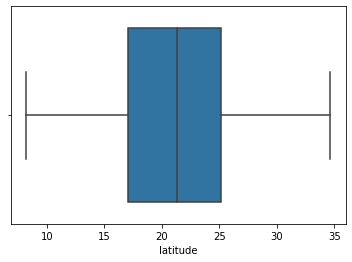

In [66]:
sns.boxplot(df['latitude'])

In [67]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source', 'Gas', 'Oil',
       'National Renewable Energy Laboratory', 'WRI',
       'Central Electricity Authority', 'CDM'],
      dtype='object')

In [68]:
#from scipy.stats import zscore
#z=np.abs(zscore(x))
#print(z)

### IQR method

In [69]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Gas,Oil,National Renewable Energy Laboratory,WRI,Central Electricity Authority,CDM
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1.748899,2003.624449,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.495595,0.002203,0.215859,0.004405,0.843612,0.572687,0.136564
std,580.221767,6.088110,4.781201,1.705671,15.238021,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,0.500256,0.046906,0.411644,0.066262,0.363423,0.494961,0.343576
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,0.000000,1997.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,60.000000,21.278850,76.978950,1.000000,2013.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,388.125000,25.183775,79.211600,3.000000,2013.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
def get_outliers(array):
    q1 = array.quantile(0.25)
    q2 = array.quantile(0.5)
    q3 = array.quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    print(f"Lower tail is {lower_tail}")
    print(f"Upper tail is {upper_tail}")

<AxesSubplot:xlabel='longitude'>

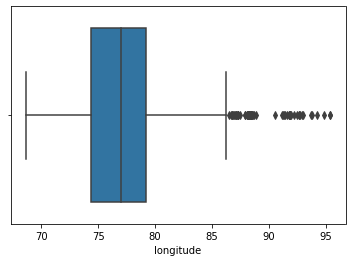

In [71]:
sns.boxplot(df['longitude'])

In [72]:
get_outliers(df['longitude'])

Lower tail is 67.15822500000002
Upper tail is 86.443625


In [73]:
df.loc[df['longitude'] > 85,'longitude'] = df['longitude'].mean()

<AxesSubplot:xlabel='longitude'>

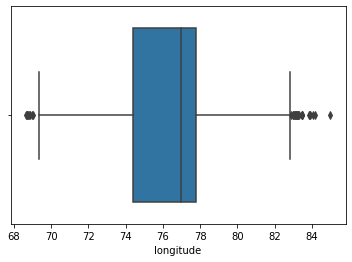

In [74]:
sns.boxplot(df['longitude'])

In [75]:
get_outliers(df['commissioning_year'])

Lower tail is 1973.0
Upper tail is 2037.0


<AxesSubplot:xlabel='commissioning_year'>

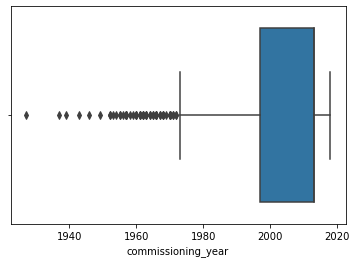

In [76]:
sns.boxplot(df['commissioning_year'])

In [77]:
from scipy.stats import mode

In [78]:
df.loc[df['commissioning_year'] < 1973,'commissioning_year'] = df['commissioning_year'].mode()

<AxesSubplot:xlabel='commissioning_year'>

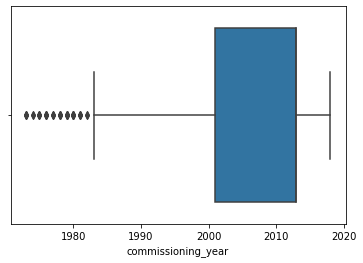

In [79]:
sns.boxplot(df['commissioning_year'])

In [80]:
get_outliers(df['generation_gwh_2013'])

Lower tail is -124.74174019468842
Upper tail is 3761.339766991147


<AxesSubplot:xlabel='generation_gwh_2013'>

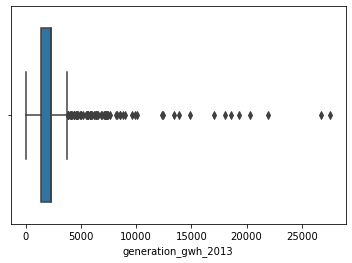

In [81]:
sns.boxplot(df['generation_gwh_2013'])

In [82]:
df.loc[df['generation_gwh_2013'] > 3761,'generation_gwh_2013'] = df['generation_gwh_2013'].mean()

<AxesSubplot:xlabel='generation_gwh_2013'>

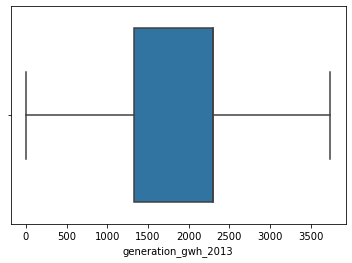

In [83]:
sns.boxplot(df['generation_gwh_2013'])

In [84]:
get_outliers(df['generation_gwh_2014'])

Lower tail is -692.4279121813395
Upper tail is 4288.086053635566


<AxesSubplot:xlabel='generation_gwh_2014'>

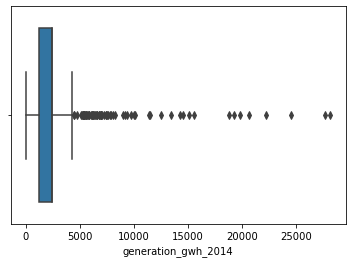

In [85]:
sns.boxplot(df['generation_gwh_2014'])

In [86]:
df.loc[df['generation_gwh_2014'] > 4288,'generation_gwh_2014'] = df['generation_gwh_2014'].mean()

<AxesSubplot:xlabel='generation_gwh_2014'>

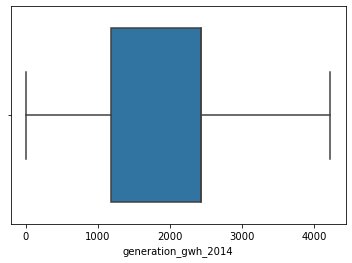

In [87]:
sns.boxplot(df['generation_gwh_2014'])

Lower tail is -1435.5960601025217
Upper tail is 4723.873433504203


<AxesSubplot:xlabel='generation_gwh_2015'>

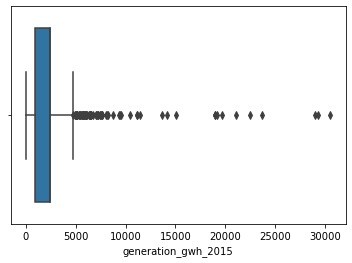

In [88]:
get_outliers(df['generation_gwh_2015'])
sns.boxplot(df['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2015'>

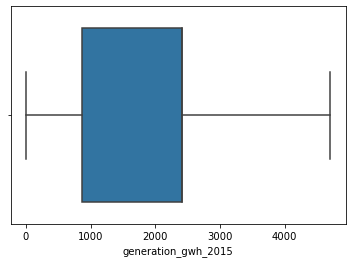

In [89]:
df.loc[df['generation_gwh_2015'] > 4723,'generation_gwh_2015'] = df['generation_gwh_2015'].mean()
sns.boxplot(df['generation_gwh_2015'])

Lower tail is -1614.3300621812377
Upper tail is 4894.896104302063


<AxesSubplot:xlabel='generation_gwh_2016'>

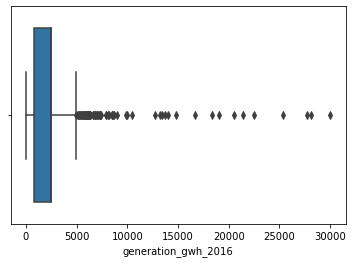

In [90]:
get_outliers(df['generation_gwh_2016'])
sns.boxplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2016'>

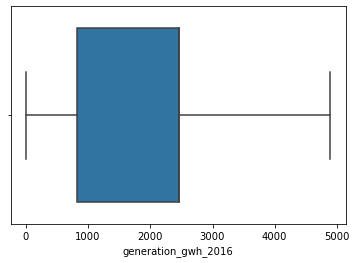

In [91]:
df.loc[df['generation_gwh_2016'] > 4894,'generation_gwh_2016'] = df['generation_gwh_2016'].mean()
sns.boxplot(df['generation_gwh_2016'])

Lower tail is -1666.5344678791976
Upper tail is 5050.727813131996


<AxesSubplot:xlabel='generation_gwh_2017'>

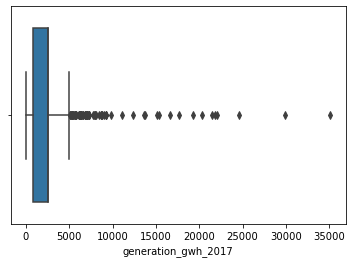

In [92]:
get_outliers(df['generation_gwh_2017'])
sns.boxplot(df['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2017'>

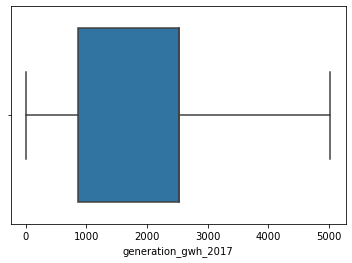

In [93]:
df.loc[df['generation_gwh_2017'] > 5050,'generation_gwh_2017'] = df['generation_gwh_2017'].mean()
sns.boxplot(df['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

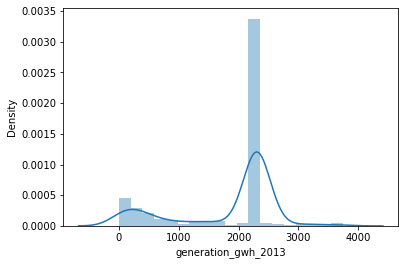

In [94]:
sns.distplot(df['generation_gwh_2013'])

In [95]:
df.shape

(908, 17)

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled_arr=scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled_arr, columns = x.columns)

In [97]:
x_scaled_df.shape

(908, 16)

In [98]:
y.shape

(908,)

In [99]:
x_scaled_df.reset_index(drop=True)

,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Gas,Oil,National Renewable Energy Laboratory,WRI,Central Electricity Authority,CDM
0,0.755851,0.171728,0.285714,0.923077,0.083522,0.086052,0.079049,0.081757,0.072097,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.626788,0.222854,0.000000,0.945055,0.083522,0.086052,0.079049,0.081757,0.072097,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.518688,0.027220,0.428571,0.945055,0.083522,0.086052,0.079049,0.081757,0.072097,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.592985,0.848756,0.571429,0.846154,0.022902,0.021964,0.027629,0.029519,0.018902,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.520821,0.514301,0.000000,0.967033,0.060476,0.107923,0.193732,0.207996,0.153365,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.306872,0.325524,0.000000,0.978022,0.083522,0.086052,0.000033,0.007783,0.024644,1.0,0.0,1.0,0.0,1.0,1.0,0.0
904,0.178409,0.355737,0.285714,0.945055,0.083522,0.086052,0.079049,0.081757,0.072097,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.268386,0.259176,0.428571,0.945055,0.083522,0.086052,0.079049,0.081757,0.072097,0.0,0.0,0.0,0.0,1.0,0.0,1.0
906,0.611066,0.190672,0.000000,0.945055,0.083522,0.086052,0.079049,0.081757,0.072097,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 6. Model Building

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Train Test Split

In [101]:
#finding best random state
from sklearn.tree import DecisionTreeRegressor
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x_scaled_df,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=r2_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.8732054456572643 on Random state 50


In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df,y, test_size = 0.2, random_state = MaxRs)

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from  sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [104]:
# model instantiating and training
Li_reg=LinearRegression()  # assign linear regression as Li_reg
Li_reg.fit(x_train,y_train) # fit train feature and label to linear regression


LinearRegression()

In [105]:
# find r2 score for trained model
Li_reg.score(x_train,y_train)  # find r2 score for train data

0.840516427237977

In [106]:
# lets check,how model fits to test data
Li_reg.score(x_test,y_test)

0.8757872786933789

In [107]:
pred1=Li_reg.predict(x_test)  # now we predict label by passing test feature
Linear_regression_score=r2_score(y_test,pred1) # we get r2 score by passing predicted label and actual label
Linear_regression_score

0.8757872786933789

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [109]:
mean_squared_error(y_test,pred1)

60875.993027404664

In [110]:
mean_squared_error(y_test,pred1)

60875.993027404664

In [111]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred2=KNR.predict(x_test)
KNR__score=r2_score(y_test,pred2)
KNR__score

0.7858985499941051

In [112]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred3=DTR.predict(x_test)
DTR__score=r2_score(y_test,pred3)
DTR__score

0.8562226158090838

In [113]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred4=RFR.predict(x_test)
RFR__score=r2_score(y_test,pred4)
RFR__score

0.9092203844463189

In [114]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred5=ABR.predict(x_test)
ABR__score=r2_score(y_test,pred5)
ABR__score

0.8017859517967543

In [115]:
svr=SVR()
svr.fit(x_train,y_train)
pred6=svr.predict(x_test)
SVR__score=r2_score(y_test,pred6)
SVR__score

-0.07760077956695888

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
Linear_regression_cv_score=cross_val_score(Li_reg,x_scaled_df,y,cv=5).mean() # we pass Linear regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Linear_regression_cv_score

0.8349185926789333

In [118]:
KNR_CV_score=cross_val_score(KNR,x_scaled_df,y,cv=5).mean() # we pass KNR model,feature,target and cv=5 means 4 set for training and 1 for testing
KNR_CV_score

0.78986442405254

In [119]:
DTR_CV_score=cross_val_score(DTR,x_scaled_df,y,cv=5).mean() # we pass model Decision Tree Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
DTR_CV_score

0.7195002819727607

In [120]:
RFR_CV_score=cross_val_score(RFR,x_scaled_df,y,cv=5).mean() # we pass model Random Forest Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
RFR_CV_score

0.8444441120696118

In [121]:
ABR_CV_score=cross_val_score(ABR,x_scaled_df,y,cv=5).mean() # we pass model Ada boost Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
ABR_CV_score

0.6233719119910017

In [122]:
SVR_CV_score=cross_val_score(svr,x_scaled_df,y,cv=5).mean() # we pass model Support Vector Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
SVR_CV_score

-0.05582142481927197

In [123]:
Linear_regression_diff=Linear_regression_score*100-Linear_regression_cv_score*100
print('Linear_regression_diff',Linear_regression_diff)
KNR_diff=KNR__score*100-KNR_CV_score*100
print('KNR_diff',KNR_diff)
DTR_diff=DTR__score*100-DTR_CV_score*100
print("DTR_diff",DTR_diff)
RFR_diff=RFR__score*100-RFR_CV_score*100
print("RFR_diff",RFR_diff)
ABR_diff=ABR__score*100-ABR_CV_score*100
print("ABR_diff",ABR_diff)
SVR_diff=SVR__score*100-SVR_CV_score*100
print("SVR_diff",SVR_diff)

Linear_regression_diff 4.086868601444564
KNR_diff -0.3965874058434764
DTR_diff 13.672233383632303
RFR_diff 6.477627237670717
ABR_diff 17.84140398057525
SVR_diff -2.1779354747686908


In [124]:
print("Linear_regression_score",Linear_regression_score)
print("Linear_regression_cv_score", Linear_regression_cv_score)
print("Linear_regression_diff", Linear_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("KNR__score",KNR__score)
print("KNR_CV_score",KNR_CV_score)
print("KNR_diff",KNR_diff)
print("-------------------------------------------------------------------------------------------")
print("DTR__score",DTR__score)
print("DTR_CV_score", DTR_CV_score)
print("DTR_diff",DTR_diff)

print("-------------------------------------------------------------------------------------------")
print("RFR__score",RFR__score)
print("RFR_CV_score",RFR_CV_score)
print("RFR_diff", RFR_diff)
print("-------------------------------------------------------------------------------------------")

print("ABR__score",ABR__score)
print("ABR_CV_score",ABR_CV_score)
print("ABR_diff",ABR_diff)
print("-------------------------------------------------------------------------------------------")
print("SVR__score",SVR__score)
print("SVR_CV_score",SVR_CV_score) 
print("SVR_diff",SVR_diff)


Linear_regression_score 0.8757872786933789
Linear_regression_cv_score 0.8349185926789333
Linear_regression_diff 4.086868601444564
-------------------------------------------------------------------------------------------
KNR__score 0.7858985499941051
KNR_CV_score 0.78986442405254
KNR_diff -0.3965874058434764
-------------------------------------------------------------------------------------------
DTR__score 0.8562226158090838
DTR_CV_score 0.7195002819727607
DTR_diff 13.672233383632303
-------------------------------------------------------------------------------------------
RFR__score 0.9092203844463189
RFR_CV_score 0.8444441120696118
RFR_diff 6.477627237670717
-------------------------------------------------------------------------------------------
ABR__score 0.8017859517967543
ABR_CV_score 0.6233719119910017
ABR_diff 17.84140398057525
-------------------------------------------------------------------------------------------
SVR__score -0.07760077956695888
SVR_CV_score -0.05582

Here we see less difference for Linear Regression ,so we will do hyperparameter tuning(REgularization) for linear regression

In [125]:
from sklearn.linear_model import Lasso,LassoCV

Lasso regularization will retun best alpha after max iterarion, alpha is learning rate

In [126]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [127]:
# best alpha parameter
alpha=lasscv.alpha_
alpha

0.11359789936328166

now we have best parameter, lets use lasso regression and see how well our data fits

In [128]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.11359789936328166)

In [129]:
lasso_reg.score(x_train,y_train)

0.8403071915684188

In [130]:
lasso_reg.score(x_test,y_test)

0.8745359484175298

as both score are near same ,so our model is not overfitted

In [131]:
import joblib
joblib.dump(Li_reg,"Global power Regression.pkl")

['Global power Regression.pkl']

# Classification

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

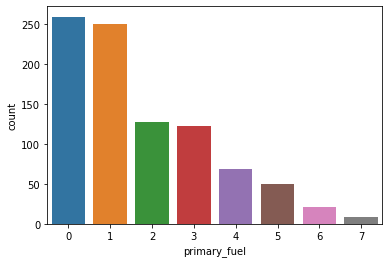

In [132]:
sns.countplot(df['primary_fuel'])

## 5. Feature Selection

In [133]:
x_cls = df.drop(['primary_fuel','commissioning_year'], axis = 1)
y_cls = df['primary_fuel']

In [134]:
scaler=MinMaxScaler()
x_scaled_arr=scaler.fit_transform(x_cls)
x_scaled_df = pd.DataFrame(x_scaled_arr, columns = x_cls.columns)

## 6. Model Building

### Train Test Split

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df,y_cls, test_size = 0.2, random_state = 1)

In [136]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [137]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)# fit training data to classifier
DTC_pred=DTC.predict(x_test)# predict output according test data
DTC_accuracy=accuracy_score(y_test,DTC_pred) #here we compared y_test with predicted output
print('DTC_accuracy',DTC_accuracy)

DTC_accuracy 0.8241758241758241


In [138]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)# fit training data to classifier
KNC_pred=KNC.predict(x_test)# predict output according test data
KNC_accuracy=accuracy_score(y_test,KNC_pred) #here we compared y_test with predicted output
print('KNC_accuracy',KNC_accuracy)

KNC_accuracy 0.8351648351648352


In [139]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
svc_pred=svc.predict(x_test) #predict output according test data
svc_accuracy=accuracy_score(y_test,svc_pred) #here we compared y_test with predicted output
print('svc_accuracy',svc_accuracy)

svc_accuracy 0.8296703296703297


In [140]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
RFC_pred=RFC.predict(x_test) #predict label according test feature
RFC_accuracy=accuracy_score(y_test,RFC_pred)#here we compared test label with predicted label
print('RFC_accuracy',RFC_accuracy)

RFC_accuracy 0.8791208791208791


In [141]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)# fit training data to classifier
GBC_pred=GBC.predict(x_test) #predict label according test feature
GBC_accuracy=accuracy_score(y_test,GBC_pred)#here we compared test label with predicted label
print('GBC_accuracy',GBC_accuracy)

GBC_accuracy 0.8681318681318682


In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
DTC_CV_score=cross_val_score(DTC,x_scaled_df,y_cls,cv=5).mean() # we pass Decision Tree classifier model,feature,target and cv=5 means 4 set for training and 1 for testing
DTC_CV_score

0.8645255297189

In [144]:
KNC_CV_score=cross_val_score(KNC,x_scaled_df,y_cls,cv=5).mean() # we pass model K neighbors Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
KNC_CV_score

0.8700564628741425

In [145]:
svc_CV_score=cross_val_score(svc,x_scaled_df,y_cls,cv=5).mean() # we pass model Support Vector Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
svc_CV_score

0.860135996600085

In [146]:
RFC_CV_score=cross_val_score(RFC,x_scaled_df,y_cls,cv=5).mean() # we pass model Random Forest Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
RFC_CV_score

0.8986825329366767

In [147]:
GBC_CV_score=cross_val_score(GBC,x_scaled_df,y_cls,cv=5).mean() # we pass model Gradient boosting Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
GBC_CV_score

0.9019792362333799

In [148]:

DTC_diff=DTC_accuracy*100-DTC_CV_score*100
print('DTC_diff',DTC_diff)
KNC_diff=KNC_accuracy*100-KNC_CV_score*100
print("KNC_diff",KNC_diff)
svc_diff=svc_accuracy*100-svc_CV_score*100
print("svc_diff",svc_diff)
RFC_diff=RFC_accuracy*100-RFC_CV_score*100
print("RFC_diff",RFC_diff)
GBC_diff=GBC_accuracy*100-GBC_CV_score*100
print("GBC_diff",GBC_diff)


DTC_diff -4.034970554307591
KNC_diff -3.489162770930733
svc_diff -3.0465666929755173
RFC_diff -1.9561653815797513
GBC_diff -3.384736810151182


In [149]:

print("DTC_accuracy",DTC_accuracy)
print("DTC_CV_score",DTC_CV_score)
print("DTC_diff",DTC_diff)
print("-------------------------------------------------------------------------------------------")
print("KNC_accuracy",KNC_accuracy)
print("KNC_CV_score", KNC_CV_score)
print("KNC_diff",KNC_diff)

print("-------------------------------------------------------------------------------------------")
print("svc_accuracy",svc_accuracy)
print("svc_CV_score",svc_CV_score)
print("svc_diff", svc_diff)
print("-------------------------------------------------------------------------------------------")

print("RFC_accuracy",RFC_accuracy)
print("RFC_CV_score",RFC_CV_score)
print("RFC_diff",RFC_diff)

print("-------------------------------------------------------------------------------------------")

print("GBC_accuracy",GBC_accuracy)
print("GBC_CV_score",GBC_CV_score) 
print("GBC_diff",GBC_diff)

print("-------------------------------------------------------------------------------------------")


DTC_accuracy 0.8241758241758241
DTC_CV_score 0.8645255297189
DTC_diff -4.034970554307591
-------------------------------------------------------------------------------------------
KNC_accuracy 0.8351648351648352
KNC_CV_score 0.8700564628741425
KNC_diff -3.489162770930733
-------------------------------------------------------------------------------------------
svc_accuracy 0.8296703296703297
svc_CV_score 0.860135996600085
svc_diff -3.0465666929755173
-------------------------------------------------------------------------------------------
RFC_accuracy 0.8791208791208791
RFC_CV_score 0.8986825329366767
RFC_diff -1.9561653815797513
-------------------------------------------------------------------------------------------
GBC_accuracy 0.8681318681318682
GBC_CV_score 0.9019792362333799
GBC_diff -3.384736810151182
-------------------------------------------------------------------------------------------


here we can see that less difference for Random Forest classifier so we will do hyperparameter tuning for Random Forest classifier

In [150]:
from sklearn.model_selection import RandomizedSearchCV

In [151]:
params = {'n_estimators':np.arange(50,200), 'criterion':['gini','entropy'],'max_depth':np.arange(5,10),'min_samples_split':np.arange(2,5),'min_samples_leaf':np.arange(1,5)}

In [152]:
best_rf_model = RandomizedSearchCV(RFC, params, cv = 5)
best_rf_model.fit(x_train, y_train)
best_rf_model.best_params_

{'n_estimators': 58,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 9,
 'criterion': 'entropy'}

In [153]:
Final_RFC=RandomForestClassifier(n_estimators=126,max_depth=7,min_samples_leaf=1 ,min_samples_split=4,criterion= 'entropy')
Final_RFC.fit(x_train,y_train)
final_pred=Final_RFC.predict(x_test)
final_score=accuracy_score(y_test,final_pred)
print(final_score*100)

87.91208791208791


In [154]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,final_pred)
cfm

array([[53,  1,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0],
       [ 0,  0, 19,  1,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0],
       [ 5,  8,  0,  0,  4,  0,  2],
       [ 2,  0,  0,  0,  0,  5,  0],
       [ 2,  1,  0,  0,  0,  0,  2]], dtype=int64)

In [155]:
joblib.dump(Final_RFC,"Global power plant classification.pkl")

['Global power plant classification.pkl']